# 1st Data Innovators Challenge 

###### First of all if you dont have all the library i used , you need to install those.. so this code is just for installing the library, uncomment those line to install

# Reading the Dataset  and check for null or duplicate values
##### if there are any null or duplicate values we will clean the dataset. 

In [1]:
import pandas as pd

data = pd.read_csv("ecommerce_customer_behavior_dataset.csv")

data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  10000 non-null  int64  
 1   Age                          10000 non-null  int64  
 2   Gender                       10000 non-null  object 
 3   Location                     10000 non-null  object 
 4   Product Category             10000 non-null  object 
 5   Purchase Amount ($)          10000 non-null  float64
 6   Time Spent on Website (min)  10000 non-null  int64  
 7   Device Type                  10000 non-null  object 
 8   Payment Method               10000 non-null  object 
 9   Discount Availed             10000 non-null  bool   
 10  Number of Items Purchased    10000 non-null  int64  
 11  Return Customer              10000 non-null  bool   
 12  Review Score (1-5)           10000 non-null  int64  
 13  Delivery Time (da

###### There is no null value

In [2]:
# checking if any duplicated value avalavle or not
print(f'Number of Duplicate value in the dataset is {data.duplicated().sum()}')

Number of Duplicate value in the dataset is 0


###### No duplicate data or Null value in this dataset so we can go further procedure


In [3]:
# data frame the dataset
df = pd.DataFrame(data)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  10000 non-null  int64  
 1   Age                          10000 non-null  int64  
 2   Gender                       10000 non-null  object 
 3   Location                     10000 non-null  object 
 4   Product Category             10000 non-null  object 
 5   Purchase Amount ($)          10000 non-null  float64
 6   Time Spent on Website (min)  10000 non-null  int64  
 7   Device Type                  10000 non-null  object 
 8   Payment Method               10000 non-null  object 
 9   Discount Availed             10000 non-null  bool   
 10  Number of Items Purchased    10000 non-null  int64  
 11  Return Customer              10000 non-null  bool   
 12  Review Score (1-5)           10000 non-null  int64  
 13  Delivery Time (da

# Level 1: Basic Insights

### Q1: Find Mean, Median and Mode(Age)

In [5]:
# Q1: Find Mean, Median and Mode(Age)

#mean value of age
mean_age = df['Age'].mean()
print(f'Mean value of Age of the dataset is: {mean_age}')

#median value of age
median_age = df['Age'].median()
print(f'Median value of Age of the dataset is: {median_age}')

#mode value of age
mode_age = df['Age'].mode()[0]
print(f'Mode value of Age of the dataset is: {mode_age}')



Mean value of Age of the dataset is: 43.7899
Median value of Age of the dataset is: 44.0
Mode value of Age of the dataset is: 51


### Q2: Find variance, standard deviation, and z-score (Purchase Amount)

In [6]:
#Variance of(Purchase Amount) of the Dataset
variance_purchase_amount = df['Purchase Amount ($)'].var()
print(f"Variance of Purchase Amount: {variance_purchase_amount:.3f}")

# Standard Daviation
std_dev_purchase_amount = df['Purchase Amount ($)'].std()
print(f"Standard Deviation of Purchase Amount: {std_dev_purchase_amount:.3f}")

# Z score A
mu = df['Purchase Amount ($)'].mean()
z_score_purchase_amount = (df['Purchase Amount ($)']-mu)/std_dev_purchase_amount
print(f"Z Score of Purchase Ammount of the dataset is:\n{z_score_purchase_amount}")


Variance of Purchase Amount: 81932.241
Standard Deviation of Purchase Amount: 286.238
Z Score of Purchase Ammount of the dataset is:
0      -1.052804
1       0.531192
2       1.606207
3      -0.063942
4      -1.259869
          ...   
9995   -1.413727
9996    1.026829
9997    1.104946
9998   -1.638330
9999   -0.944817
Name: Purchase Amount ($), Length: 10000, dtype: float64


In [7]:
# checking how spread the Z score is
min_z = z_score_purchase_amount.min()
max_z = z_score_purchase_amount.max()

print(f"Minimum Z score: {min_z:.3f}")
print(f"Maximum Z score: {max_z:.3f}")

Minimum Z score: -1.742
Maximum Z score: 1.733


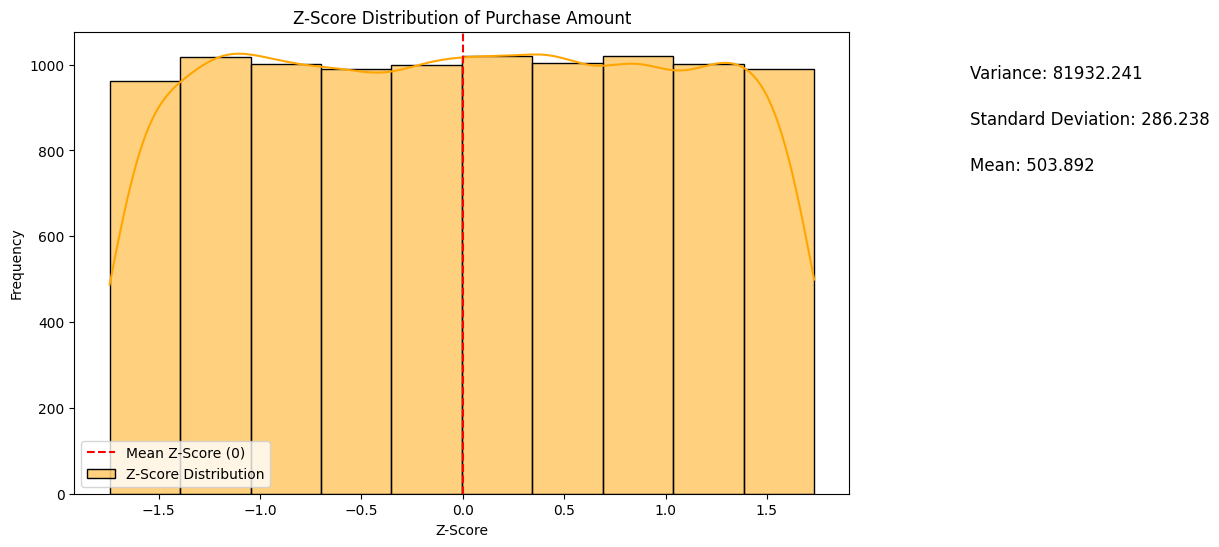

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mean_purchase = df['Purchase Amount ($)'].mean()


plt.figure(figsize=(10, 6))
sns.histplot(z_score_purchase_amount, kde=True, color='orange', bins=10, label='Z-Score Distribution')
plt.axvline(0, color='red', linestyle='--', label='Mean Z-Score (0)')


variance_purchase_amount = df['Purchase Amount ($)'].var()
std_dev_purchase_amount = df['Purchase Amount ($)'].std()


plt.text(2.5, plt.gca().get_ylim()[1] * 0.9, f"Variance: {variance_purchase_amount:.3f}", fontsize=12, color='black')
plt.text(2.5, plt.gca().get_ylim()[1] * 0.8, f"Standard Deviation: {std_dev_purchase_amount:.3f}", fontsize=12, color='black')
plt.text(2.5, plt.gca().get_ylim()[1] * 0.7, f"Mean: {mean_purchase:.3f}", fontsize=12, color='black')

# Customizing the plot
plt.title('Z-Score Distribution of Purchase Amount')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.legend()

plt.show()


## Q3: What are the top three product categories based on the number of purchases?

##### At first Group by catagory and counting the  total number of sale in same catagory


In [9]:
category_group = df.groupby('Product Category').agg(
    total_items_purchased=('Number of Items Purchased', 'sum')
)

#sort the categories by 'total_items_purchased' in descending order
sorted_categories = category_group.sort_values(by='total_items_purchased', ascending=False)

sorted_categories


,total_items_purchased
Product Category,
Toys,6580
Books,6533
Electronics,6469
Clothing,6359
Home,6214
Groceries,6067
Beauty,6057
Sports,5706


In [10]:
#top 3 products based on number or purchase

top_3_categories = sorted_categories.head(3).reset_index()

top_3_categories


,Product Category,total_items_purchased
0,Toys,6580
1,Books,6533
2,Electronics,6469


### Q4: How many customers are classified as return customers?

In [11]:
return_customer = df[df['Return Customer']==1].shape[0]
print(f'Number of returne customer is {return_customer}')
      

Number of returne customer is 4996


### Q5: What is the average review score given by customers?

In [12]:
avg_review_score = df['Review Score (1-5)'].mean()

print(f"Avarage review score is: {avg_review_score:.1f}")

Avarage review score is: 3.0


### Q6: How does the average delivery time vary between subscription statuses (Free,Premium)?

In [13]:
# Avarage Delivery time for Free users
free_subscriber = df[df['Subscription Status']=='Free']
avg_free_delivery_time = free_subscriber['Delivery Time (days)'].mean()
avg_free_delivery_time



6.963923673225999

In [14]:
premium_subscriber = df[(df['Subscription Status']=='Premium') |(df['Subscription Status']=='Trial')] # Assuming Trial users are Premium subscriber
premium_subscriber_delivery_time = premium_subscriber['Delivery Time (days)'].mean()
premium_subscriber_delivery_time

7.037767077941619

### Q7: How many customers are subscribed to the service?

In [15]:
# number of subscribed user to the service
subscriber = df[(df['Subscription Status']=='Premium') ].shape[0] # assuming trial users are Not subscriber
print(f'The total number of Customer subscribed to the service is {subscriber}')

The total number of Customer subscribed to the service is 3369


### Q8: What percentage of customers used devices to make purchases? (Mobile, Desktop,Tablet)

In [16]:

mobile_user = df[df['Device Type']=='Mobile'].shape[0]
desktop_user = df[df['Device Type']=='Desktop'].shape[0]
tablet_user = df[df['Device Type']=='Tablet'].shape[0]

# total user is 10000
total_user = mobile_user+desktop_user+tablet_user
total_user

10000

In [17]:

mobile_user_percentage = mobile_user*100/total_user
print("Percentage of customer used Mobile to make purchase: ", mobile_user_percentage, "%")

desktop_user_percentage = desktop_user*100/total_user
print("Percentage of customer used Desktop to make purchase: ", desktop_user_percentage, "%")

tablet_user_percentage = tablet_user*100/total_user
print('Percentage of customer used Tablet to make purchase: ', tablet_user_percentage)


Percentage of customer used Mobile to make purchase:  33.74 %
Percentage of customer used Desktop to make purchase:  33.48 %
Percentage of customer used Tablet to make purchase:  32.78


### Q9: What is the average purchase amount for customers who availed discounts compared to those who didn’t?


In [19]:
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High


In [20]:
df_discount = df[df['Discount Availed']==1]
df_no_discount = df[df['Discount Availed']==0]

avg_purchase_discount = df_discount['Purchase Amount ($)'].mean()
print(f'Avarage Purchase amount for customer who used Discount is {avg_purchase_discount:.2f}$')

avg_purchase_not_discount = df_no_discount['Purchase Amount ($)'].mean()
print(f'Avarage Purchase amount for customer who did not use Discount is {avg_purchase_not_discount:.2f}$')

Avarage Purchase amount for customer who used Discount is 505.26$
Avarage Purchase amount for customer who did not use Discount is 502.51$


### Q10: What is the most common payment method used by customers?

In [21]:
df.head(10)

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High
5,6,63,Female,Rajshahi,Books,755.39,54,Tablet,Cash on Delivery,False,6,True,3,4,Trial,High
6,7,28,Female,Khulna,Groceries,866.41,41,Desktop,Debit Card,True,3,True,2,2,Free,High
7,8,38,Male,Dhaka,Electronics,103.12,46,Desktop,Debit Card,False,1,False,3,13,Premium,Low
8,9,54,Other,Sylhet,Books,924.58,47,Mobile,PayPal,False,9,True,2,11,Trial,Medium
9,10,33,Male,Khulna,Groceries,184.64,18,Mobile,Debit Card,True,9,False,4,1,Trial,Low


In [22]:
# Group by 'Payment Method' and count 
df_payment = df.groupby('Payment Method').agg(
    total_payment_method=('Payment Method', 'count')
)

df_payment = df_payment.sort_values(by='total_payment_method', ascending=False).reset_index()

common_payment_method = df_payment.at[0, 'Payment Method']

print(f'Most common payment method is {common_payment_method}')


Most common payment method is Bank Transfer


# Level 2: Intermediate Insights (21 Marks)

### Q1: What are the average review scores of users of the most common payment method?

As we Discoverd that The most common method is Bank Transfer.
So we just need to calculate average review scores of Those who used Bank Transfer.

In [23]:
df_review_of_most_common_method = df[df['Payment Method']==common_payment_method]
avg_scr_common_method = df_review_of_most_common_method['Review Score (1-5)'].mean()

print(f"Avarage score of Most common method is {avg_scr_common_method:.1f}")

Avarage score of Most common method is 3.0


### Q2: What is the correlation between time spent on the website and purchase amount? Do customers who spend more time on the website purchase more items?

In [24]:
df_corr_tm_pa= df[['Time Spent on Website (min)', 'Purchase Amount ($)']]

corr_matrix1 =df_corr_tm_pa.corr()
corr_matrix1

,Time Spent on Website (min),Purchase Amount ($)
Time Spent on Website (min),1.000000,0.010025
Purchase Amount ($),0.010025,1.000000


In [25]:
df_corr_tm_ni = df[['Time Spent on Website (min)','Number of Items Purchased']]
corr_matrix2 = df_corr_tm_ni.corr()
corr_matrix2

,Time Spent on Website (min),Number of Items Purchased
Time Spent on Website (min),1.000000,0.000148
Number of Items Purchased,0.000148,1.000000


a correlation value between -1 and 1:
    1 means perfect positive correlation.
    -1 means perfect negative correlation.
    0 means no correlation.

### Q3: What percentage of customers are satisfied (rating of 4 or 5) and are also return customers?

In [26]:
df.head(1)

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low


In [27]:
total_satisfied_customer = df[df['Review Score (1-5)']>=4].shape[0]

satisfied_returned_customer = df[(df['Review Score (1-5)']>=4) & (df['Return Customer']==1)].shape[0]
print(f'Total Satisfied Customer assuming only rating 4 or 5 as per question is: {total_satisfied_customer}')
print(f'Satisfied and Return Customer: {satisfied_returned_customer}')

percentage_sat_ret_cus = satisfied_returned_customer*100/total_satisfied_customer

print(f'Percentage of Satisfied and Retuen customer is {percentage_sat_ret_cus:.2f}')

Total Satisfied Customer assuming only rating 4 or 5 as per question is: 4004
Satisfied and Return Customer: 2008
Percentage of Satisfied and Retuen customer is 50.15


### Q4: What is the relationship between the number of items purchased and customer satisfaction?

In [53]:
df_q4 = df[['Number of Items Purchased','Review Score (1-5)']]
df_q4 = df_q4[df['Review Score (1-5)']>=4]

df_q4_corr = df_q4.corr()
df_q4_corr



,Number of Items Purchased,Review Score (1-5)
Number of Items Purchased,1.000000,-0.003408
Review Score (1-5),-0.003408,1.000000


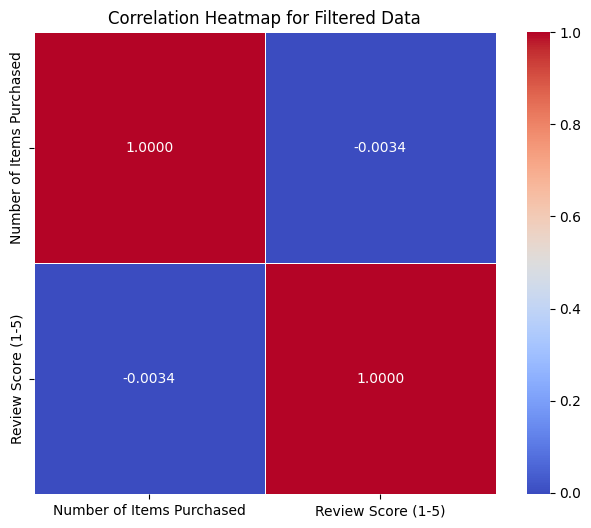

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))

sns.heatmap(df_q4_corr, annot=True, cmap='coolwarm', fmt='.4f', square=True, linewidths=.5)

plt.title('Correlation Heatmap for Filtered Data')

plt.show()


### Q5: Which location has the 2nd highest average purchase amount?

In [30]:
df_loc_avg = df.groupby('Location').agg(
    Average = ('Purchase Amount ($)', 'mean')
)
df_loc_avg = df_loc_avg.sort_values(by='Average', ascending=False).reset_index()

second_highest_purchase_loc = df_loc_avg.at[1,'Location']
print(f'{second_highest_purchase_loc} has the 2nd highest average purchase amount')
print(df_loc_avg.at[1,'Average'])

Barisal has the 2nd highest average purchase amount
513.6745599999999


# Level 3: Critical Thinking Insights 

### Q1: What factors contribute most to a customer being classified as a return customer?

In [31]:
return_factors = data[data['Return Customer'] == 1]
return_factors

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High
5,6,63,Female,Rajshahi,Books,755.39,54,Tablet,Cash on Delivery,False,6,True,3,4,Trial,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,9993,69,Other,Rangpur,Sports,940.90,56,Desktop,Cash on Delivery,True,2,True,4,11,Trial,High
9995,9996,48,Other,Chittagong,Electronics,99.23,32,Desktop,PayPal,True,2,True,3,7,Premium,Medium
9997,9998,50,Other,Mymensingh,Sports,820.17,17,Mobile,Credit Card,True,8,True,3,11,Trial,High
9998,9999,24,Female,Khulna,Groceries,34.94,3,Mobile,Debit Card,False,3,True,3,5,Free,Medium


In [32]:
df['Time Spent on Website (min)'].nunique()

59

In [33]:
df['Age'].max()

69

In [34]:

bins = [0, 18, 25, 32, 40, 46, 55, 65, 100]
labels = ['Below 18', '18-25', '26-32', '33-40', '41-46', '46-55', '55-65', '65 to above']

age_df = pd.DataFrame({'Age': df['Age']})
age_df['Age Range'] = pd.cut(age_df['Age'], bins=bins, labels=labels, right=False)

age_counts = age_df['Age Range'].value_counts(sort=False)

age_counts_df = age_counts.reset_index()

age_counts_df.columns = ['Age Range', 'Count']


age_counts_df


,Age Range,Count
0,Below 18,0
1,18-25,1322
2,26-32,1319
3,33-40,1514
4,41-46,1121
5,46-55,1757
6,55-65,2009
7,65 to above,958


In [35]:
product_df = df.groupby('Product Category').agg(
    total_product_sale = ('Purchase Amount ($)','sum')
).reset_index()
product_df

,Product Category,total_product_sale
0,Beauty,603258.30
1,Books,664338.38
2,Clothing,646848.53
3,Electronics,640727.65
4,Groceries,604150.58
5,Home,647106.92
6,Sports,566959.20
7,Toys,665535.38


In [36]:
df.head(2)

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium


In [61]:
correlation_factors = data[['Age','Purchase Amount ($)', 'Time Spent on Website (min)', 
                            'Discount Availed', 'Number of Items Purchased', 
                            'Review Score (1-5)', 'Return Customer']].corr()


correlation_factors['Return Customer']


Age                           -0.008255
Purchase Amount ($)            0.001924
Time Spent on Website (min)   -0.006286
Discount Availed               0.025003
Number of Items Purchased      0.000815
Review Score (1-5)             0.008757
Return Customer                1.000000
Name: Return Customer, dtype: float64

In [38]:
from json import encoder
from sklearn.preprocessing import LabelEncoder

In [39]:
df_cp = df.copy()
encoder = LabelEncoder()

categorical = df.select_dtypes(include=["object", "bool"]).columns

for col in categorical:
    df_cp[col] = encoder.fit_transform(df_cp[col])


In [60]:
import pandas as pd
from scipy.stats import chi2_contingency

chi_square_results = []


for col in categorical:
    tab = pd.crosstab(df_cp['Return Customer'], df_cp[col])
    chi2, p_value, dof, expected = chi2_contingency(tab)
    
    chi_square_results.append({
        'Column Name': col,
        'P-Value': p_value,
    })

chi_square_df = pd.DataFrame(chi_square_results)

# Display the DataFrame
chi_square_df.sort_values(by='P-Value')


,Column Name,P-Value
6,Return Customer,0.000000
5,Discount Availed,0.013128
0,Gender,0.087425
1,Location,0.431296
8,Customer Satisfaction,0.474053
4,Payment Method,0.544397
7,Subscription Status,0.610225
2,Product Category,0.613189
3,Device Type,0.893618


### Q2: How do payment methods influence customer satisfaction and return rates?

In [41]:
total_customer = df['Customer ID'].nunique()


payment_method_count = df['Payment Method'].nunique()
payment_method_count

df_payment

df_payment_percentage = df_payment.copy()
df_payment_percentage['Payment_Percentage'] = df_payment_percentage['total_payment_method']/total_customer*100
df_payment_percentage




,Payment Method,total_payment_method,Payment_Percentage
0,Bank Transfer,2067,20.67
1,Credit Card,2028,20.28
2,Cash on Delivery,2007,20.07
3,Debit Card,1983,19.83
4,PayPal,1915,19.15


In [42]:
df['Customer Satisfaction'].nunique()

3

In [44]:
total_satisfied_customer # 4004


for index,row in df_payment_percentage.iterrows():
    payment_method = row['Payment Method']

    High_Satisfaction = df[(df['Payment Method']==payment_method) & (df['Customer Satisfaction']=='High')].shape[0]
    Medium_Satisfaction = df[(df['Payment Method']==payment_method) & (df['Customer Satisfaction']=='Medium')].shape[0]
    Low_Satisfaction = df[(df['Payment Method']==payment_method) & (df['Customer Satisfaction']=='Low')].shape[0]

    df_payment_percentage.at[index,'High Satisfied']= High_Satisfaction
    df_payment_percentage.at[index,'High Satisfied Percentage']= High_Satisfaction*100/df_payment_percentage.loc[index,'total_payment_method']
    df_payment_percentage.at[index,'Medium Satisfied']= Medium_Satisfaction
    df_payment_percentage.at[index,'Medium Satisfied Percentage']= Medium_Satisfaction*100/df_payment_percentage.loc[index,'total_payment_method']
    df_payment_percentage.at[index,'Low Satisfied']= Low_Satisfaction
    df_payment_percentage.at[index,'Low Satisfied Percentage']= Low_Satisfaction*100/df_payment_percentage.loc[index,'total_payment_method']

df_payment_percentage


,Payment Method,total_payment_method,Payment_Percentage,High Satisfied,High Satisfied Percentage,Medium Satisfied,Medium Satisfied Percentage,Low Satisfied,Low Satisfied Percentage
0,Bank Transfer,2067,20.67,702.0,33.962264,687.0,33.236575,678.0,32.801161
1,Credit Card,2028,20.28,703.0,34.664694,628.0,30.966469,697.0,34.368836
2,Cash on Delivery,2007,20.07,627.0,31.240658,677.0,33.731938,703.0,35.027404
3,Debit Card,1983,19.83,668.0,33.686334,651.0,32.829047,664.0,33.484619
4,PayPal,1915,19.15,604.0,31.540470,688.0,35.926893,623.0,32.532637


In [45]:

for index , row in df_payment_percentage.iterrows():
    payment_method=row['Payment Method']

    return_payment = df[(df['Payment Method']== payment_method) & (df['Return Customer']==1)].shape[0]
    non_return_payment =df[(df['Payment Method']== payment_method) & (df['Return Customer']==0)].shape[0]


    df_payment_percentage.at[index,'Returned Customer'] = return_payment
    df_payment_percentage.at[index,"Returned Customer Percentage"]= return_payment*100/df_payment_percentage.loc[index,'total_payment_method']
    df_payment_percentage.at[index,'Non Returned Customer'] = non_return_payment
    df_payment_percentage.at[index,"Non Returned Customer Percentage"]= non_return_payment*100/df_payment_percentage.loc[index,'total_payment_method']


df_payment_percentage

,Payment Method,total_payment_method,Payment_Percentage,High Satisfied,High Satisfied Percentage,Medium Satisfied,Medium Satisfied Percentage,Low Satisfied,Low Satisfied Percentage,Returned Customer,Returned Customer Percentage,Non Returned Customer,Non Returned Customer Percentage
0,Bank Transfer,2067,20.67,702.0,33.962264,687.0,33.236575,678.0,32.801161,1046.0,50.604741,1021.0,49.395259
1,Credit Card,2028,20.28,703.0,34.664694,628.0,30.966469,697.0,34.368836,1039.0,51.232742,989.0,48.767258
2,Cash on Delivery,2007,20.07,627.0,31.240658,677.0,33.731938,703.0,35.027404,982.0,48.928749,1025.0,51.071251
3,Debit Card,1983,19.83,668.0,33.686334,651.0,32.829047,664.0,33.484619,974.0,49.117499,1009.0,50.882501
4,PayPal,1915,19.15,604.0,31.540470,688.0,35.926893,623.0,32.532637,955.0,49.869452,960.0,50.130548


### Q3: How does the location influence both purchase amount and delivery time?

In [47]:
df_loc = df.groupby('Location').agg(
    max_Purchase = ('Purchase Amount ($)','max'),
    min_Purchase = ('Purchase Amount ($)','min'),
    no_of_purchase = ('Purchase Amount ($)','count'),
    Avg_Purchase = ('Purchase Amount ($)', 'mean'),
    Avg_Delivery_Days = ('Delivery Time (days)', 'mean')
)
df_loc.reset_index()

,Location,max_Purchase,min_Purchase,no_of_purchase,Avg_Purchase,Avg_Delivery_Days
0,Barisal,999.17,5.19,1250,513.674560,7.072800
1,Chittagong,999.73,5.98,1272,507.851675,7.020440
2,Dhaka,999.86,7.65,1206,502.002504,6.941957
3,Khulna,999.80,5.34,1291,513.937072,6.811774
4,Mymensingh,999.82,6.21,1280,507.892211,7.099219
5,Rajshahi,999.67,6.00,1211,495.544649,7.113130
6,Rangpur,998.56,5.54,1253,494.368867,7.031125
7,Sylhet,999.98,5.77,1237,494.976427,7.018593


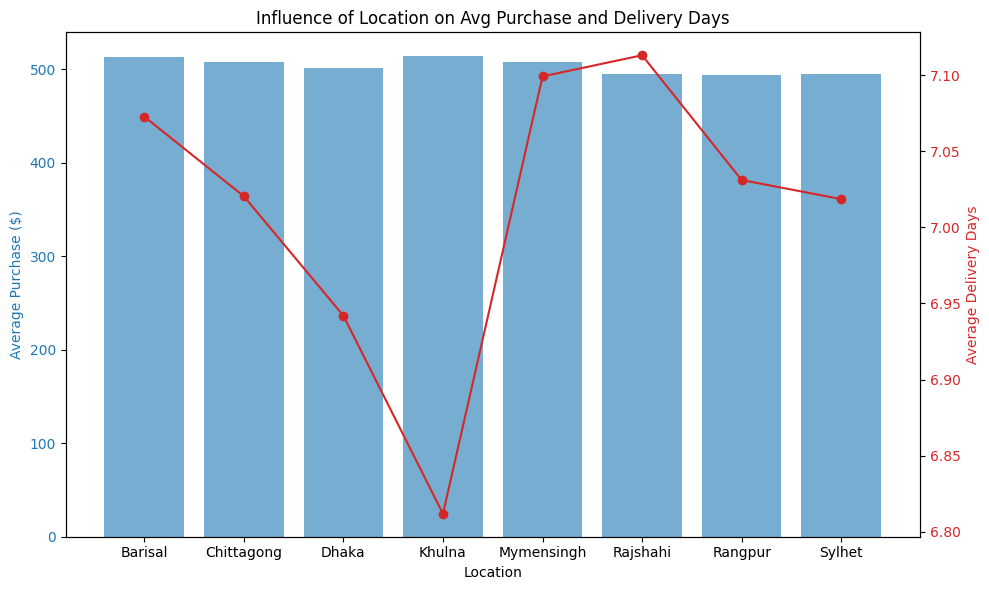

In [48]:

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Avg Purchase on the first y-axis (left)
ax1.set_xlabel('Location')
ax1.set_ylabel('Average Purchase ($)', color='tab:blue')
ax1.bar(df_loc.index, df_loc['Avg_Purchase'], color='tab:blue', alpha=0.6, label='Avg Purchase')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second y-axis for Avg Delivery Days
ax2 = ax1.twinx()  
ax2.set_ylabel('Average Delivery Days', color='tab:red')  
ax2.plot(df_loc.index, df_loc['Avg_Delivery_Days'], color='tab:red', marker='o', label='Avg Delivery Days')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Influence of Location on Avg Purchase and Delivery Days')
fig.tight_layout() 
plt.show()


### Q4: What major insights are found? Give a proper explanation.